# Cluster Analysis II


## So far ...

- $k$-means is fast but:
  - sensitive to outliers
  - assumes globular clusters
  - workds better with similarly sized clusters
- $k$-medoids (PAM) is slower but:
  - less sensitive to ourliers
- Hierarchical clustering is slow but:
  - provides different measure for different clusters configurations
  - still sensitive to noise and outliers
  
## Today

Deal with noise and outliers with **density-based clustering**.


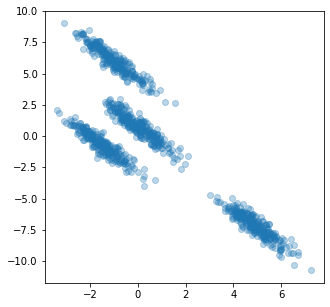

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=1.0,
                            random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

# plot
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1], alpha=0.3);


## Density-Based Clustering Methods

- Clustering based on density (local cluster criterion), such as density-connected points
- Major features:
  - Discover clusters of arbitrary shape
  - Handle noise
  - One scan
  - Need density parameters as termination condition

## DBSCAN: Density-Based Clustering Based on Connected Regions with High Density


- Basic idea:
  - detect objects in **dense regions**
  - **merge close dense regions** into a cluster
  - discard objects in **sparse regions** as noise

## Step 1. When a point $p$ is in a dense region?

- A object $p$ in the dataset ${\cal D}$ is said **core point** if there are at least $MinPts$ within distance $\epsilon$.

- Let the neighborhood of $p$ be:
$$
N_\epsilon(p) = \{q \in {\cal D} ~|~ \textsf{dist}(p,q)\leq \epsilon \}
$$

- object $p$ is **core point** if:
$$
|N_\epsilon(p)|\geq MinPts
$$

- Note that $\epsilon$ and $MinPts$ are tuning parameters to be decided by the analyst.

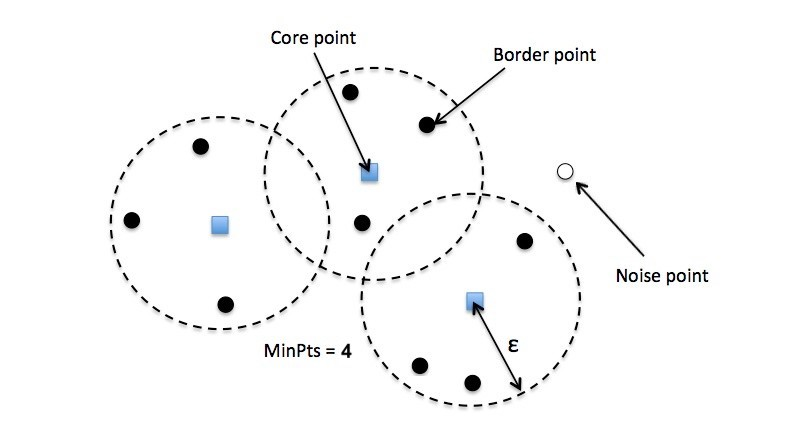

## Step 2. Which points should belong to the same cluster of $p$?

- A point $q$ is **directly density-reachable** from $p$ if:
  - $p$ is a **core point** and
  - $q \in N_\epsilon(p)$
  
Then, applying transitivity:

- A point $q$ is **density-reachable** from $p$ if:
  - there exists a *chain* of points $p_1, \ldots, p_n$, with $p_1=p$ and $p_n=q$, such that
  - $p_{i+1}$ is **directly density-reachable** from $p_{i}$

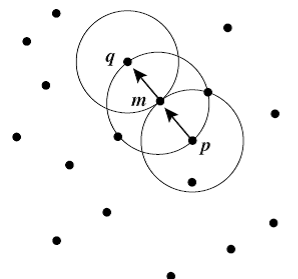

## Step 3. Any other point?

- Note that **density reachability** is not symmetric
  - $q$ might not be a *core point* in the example above
- This may cause situations where several some points are directly reachable from point $o$, but those points are not directly reachable from one another
- *Relax* the *reciprocity*
- A point $s$ is **density-connected** to $r$ if:
  - there exists a point $o$ such that
  - $s$ is **density-reachable** from $o$, and
  - $r$ is **density-reachable** from $o$

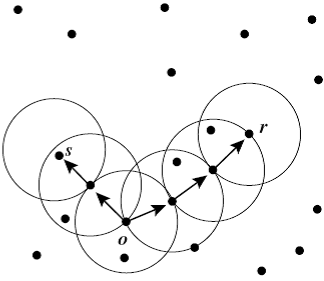

## Step 4. The end

- Density-connected points form clusters
- Other points are discarded as outliers/noise

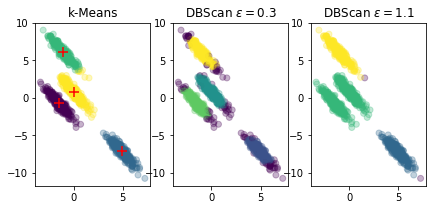

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, 
                            cluster_std=1, random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)

fig, axs = plt.subplots(ncols=3, figsize=(7,3))

# -----------
# K-Means
k_means = KMeans(n_clusters=N_CENTERS, n_init=1)
k_means.fit(X)
# plot output of k-means
axs[0].scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=0.3)
c = k_means.cluster_centers_
axs[0].scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
axs[0].set_title("k-Means")



# -----------
# DBScan
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X)
# plot output of k-means
axs[1].scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
axs[1].set_title("DBScan $\epsilon=0.3$")

dbscan = DBSCAN(eps=1.1, min_samples=10)
labels = dbscan.fit_predict(X)
# plot output of k-means
axs[2].scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
axs[2].set_title("DBScan $\epsilon=1.1$");


### Exercise: Compare DBScan with hierarchical clustering

## DBScan Algorithm

<div class="alert alert-info">

**DBScan Algorithm**

1. *§ Empty set of clusters*
1. ${\mathcal C} \gets \emptyset$
1. *§ Initially all objects are marked as unvisited, and not noisy*
1. **for each** $p \in D$:
1. $\quad$ visited$[p] \gets$ False
1. $\quad$ noise$[p] \gets$ False
1. *§ Process all unvisited points*
1. **for each** $p \in D$:
1. $\quad$ **if**  visited$[p]$:
1. $\quad\quad$ **continue**
1. $\quad$visited$[p] \gets$ True
1. $\quad$ *§ Check neighborhood density*
1. $\quad$ **if** $|N_\epsilon(p)|<MinPts$:
1. $\quad\quad$ *Mark as noise and go to the next point*
1. $\quad\quad$ *Note that the noise label might be updated later*
1. $\quad\quad$ noise$[p]$ = True
1. $\quad\quad$ **continue**
1. $\quad$ *§ Build a cluster starting from $p$*
1. $\quad$ $C \gets \{p\}$
1. $\quad$ *§ Create a queue of candidate points for a recursive visit*
1. $\quad$ $Q \gets N_\epsilon(p)$
1. $\quad$ **while** $Q \neq \emptyset$;
1. $\quad\quad$ *§ Get an point from $Q$*
1. $\quad\quad$ $q = $ $Q$.pop()
1. $\quad\quad$ *§ Add to $Q$ unvisited core points in the neighborhood*
1. $\quad\quad$ **if** $!$visited$[q]$:
1. $\quad\quad\quad$ visited$[q]$ = True
1. $\quad\quad\quad$ **if** $|N_\epsilon(q)|\geq MinPts$:
1. $\quad\quad\quad\quad$  $Q \gets Q \cup N_\epsilon(q)$
1. $\quad\quad$ *§ If not in any cluster then add to to the current cluster*
1. $\quad\quad$ *§ This might include noisy but density-reachable points*
1. $\quad\quad$ **if** $q \notin C, \forall C \in {\cal C}$:
1. $\quad\quad\quad\quad$ $C \gets C \cup \{q\}$
1. $\quad\quad\quad\quad$ noise$[p] \gets$ False
1. $\quad$ *§ Add $C$ to the set of clusters*
1. $\quad$ ${\cal C} \gets {\cal C} \cup \{C\}$ 
</div>


<div class="alert alert-warning" role="alert">

**Complexity** is $O(n \log n)$ if a spatial index is used.
</div>     

## DBScan Comments

- **Strengths**:
  - Handles **noise** explicitly
  - Handles clusters of **arbitrary shape and size**
- **Weakness**:
  - It may be hard to find the right parameters for data of varying density

You can play a bit with DBScan here: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# Again on Random Forest as a similarity Estimator

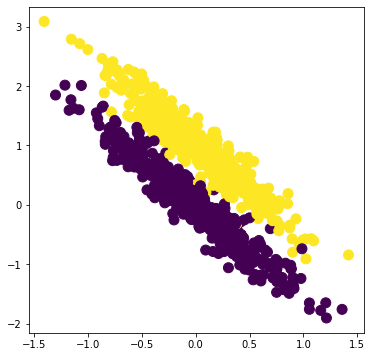

In [3]:
# generate some random data
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[0,0],[1,1]], 
                  cluster_std=.3, random_state=2)
transformation = [[1, -1], [-1, 2]]
X = np.dot(X, transformation)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=y, s=100);

#### DBScan on the original data

Try tuning DB-Scan parameters. It's not trivial to come up with a good result. Informally, we will used this hardness and instability to evaluate the similarity measure produced by a random forest.

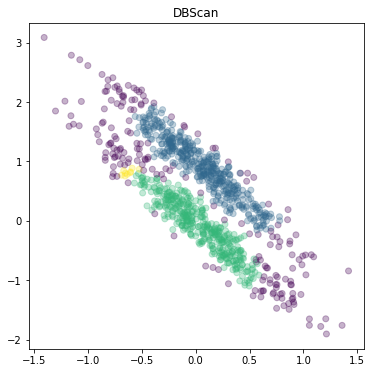

In [4]:
from sklearn.cluster import DBSCAN

# try changing params
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(X)

# plot output of k-means
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=dbscan.labels_, alpha=0.3)
ax.set_title("DBScan");


#### DBScan exploiting RandomForest Similarity

We compute all pair-wise distances as 1 minus the fraction of common leaves.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# train a decision tree classifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X,y)

from sklearn.metrics import pairwise_distances

# pairwise distance
leaves = rf.apply(X)
pair_wise_dist = pairwise_distances( X=leaves, 
                                     metric= lambda oi, oj: 
                                             1.0-np.mean(oi==oj))

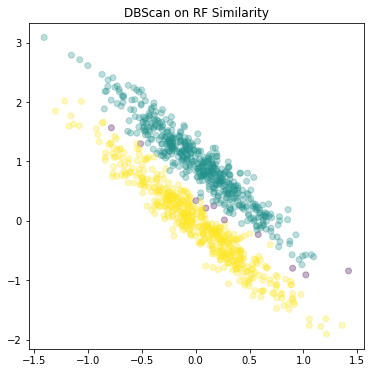

In [6]:
# try changing params
dbscan = DBSCAN(eps=.5, min_samples=5, metric="precomputed")
dbscan.fit(pair_wise_dist)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=dbscan.labels_, alpha=0.3)
ax.set_title("DBScan on RF Similarity");


Below we visualize the Euclidean distance and the random forest distance to see its "shape" in the given 2D space.

####  Euclidean Distance

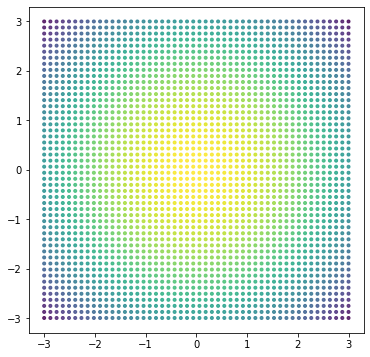

In [7]:
origin = np.array([0.0,0.0])

# compute the decition map
x_min, x_max = -3,3
y_min, y_max = -3,3
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
               for yy in np.linspace(y_min, y_max, 50) ]
zz = np.array(zz)
Z = np.sum( (zz-origin)**2.0, axis=1)
Z = Z.max()-Z

# plot data and decition map
fig, ax = plt.subplots(figsize=(6,6))
#ax.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.2)
ax.scatter(zz[:,0], zz[:,1], c=Z, marker='.', alpha=.8);

####  Random Forest Distance

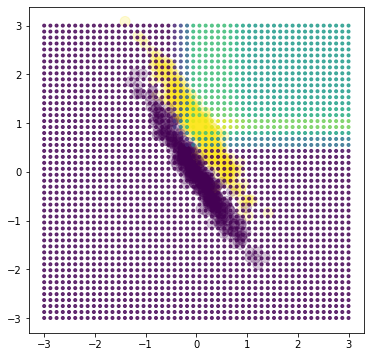

In [8]:
# train a decision tree classifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X,y)

# change origin
origin = rf.apply( [ np.array([0,1]) ] )

# compute the decition map
x_min, x_max = -3,3
y_min, y_max = -3,3
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
               for yy in np.linspace(y_min, y_max, 50) ]
zz = np.array(zz)
Z = rf.apply(zz)

Z = (Z==origin).mean(axis=1)

# plot data and decition map
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.2)
ax.scatter(zz[:,0], zz[:,1], c=Z, marker='.', alpha=.8);